# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [1]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
    
    def __repr__(self):
        return f"{self.rank} of {self.suit}"

In [2]:
import random

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    
    def __init__(self, num_decks=6):
        ############multiple 52-card decks
        self.cards = [Card(suit, rank) for suit in Deck.suits for rank in Deck.ranks] * num_decks
        # Place plastic card within 50-75% of the deck
        self.plastic_card_position = random.randint(len(self.cards) // 2, len(self.cards) * 3 // 4)
        self.shuffle()
        
    def shuffle(self):
        random.shuffle(self.cards)
        print("Deck shuffled.")
        
    def draw_card(self):
        if len(self.cards) == 0:
            raise ValueError("The deck is empty!")
        
        card = self.cards.pop()
        
        # Check if  plastic card position has been reached
        if len(self.cards) == self.plastic_card_position:
            print("Plastic card reached; deck will reshuffle after this game.")
            # Trigger reshuffle after the current game is complete
            self.shuffle()
            # Reset plastic card for the reshuffled deck
            self.plastic_card_position = random.randint(len(self.cards) // 2, len(self.cards) * 3 // 4)
        
        return card

    def __len__(self):
        return len(self.cards)


3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [3]:
class Card:
    def __init__(self, suit, rank):
        # Data members
        self.suit = suit  #
        self.rank = rank  #
    def get_value(self):
        pass

    def __repr__(self):
        pass
class Hand:
    def __init__(self):
        # Data members
        self.cards = []  # List of Card objects
        self.value = 0    # Value of the hand (calculated based on cards)

    def add_card(self, card):
        pass

    def calculate_value(self):
        pass

class Deck:
    def __init__(self, num_decks=6):
        # Data members
        self.cards = []  # List of Card objects
        self.plastic_card_pos = 0  # Position of the plastic card
        self.num_decks = num_decks  # Number of 52-card decks

    def draw_card(self):
        pass

    def shuffle(self):
        pass
class Strategy:
    def __init__(self):
        # Data members
        pass

    def execute(self, hand, dealer_card, deck):
        pass

class Player:
    def __init__(self, name, strategy=None):
        # Data members
        self.name = name  # Name of the player
        self.chips = 1000  # Chips for the player
        self.hand = Hand()  # Player's hand
        self.strategy = strategy if strategy else Strategy()  # Strategy for the player

    def place_bet(self, amount):
        pass
    def play_turn(self, deck):
        pass

    
class BlackjackGame:
    def __init__(self, num_players=1, num_decks=6):
        # Data members
        self.deck = Deck(num_decks)  # The deck used in the game
        self.dealer = Player("Dealer")  # Dealer (can be treated as a player too)
        self.players = []  # List of players in the game
        self.rounds = 0  # Number of rounds played
        
        # Add players to the game
        for i in range(num_players):
            self.players.append(Player(f"Player {i + 1}"))
    def start_game(self):
        pass
    def deal_initial(self):
        pass
    def play_round(self):
        pass
    def end_game(self):
        pass

In [4]:
game = BlackjackGame(num_players=2)  # game with 2 players
game.start_game()  
print(game.players[0].name, game.players[1].name, game.dealer.name)  


Player 1 Player 2 Dealer


4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [5]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def get_value(self):
        if self.rank in ['Jack', 'Queen', 'King']:
            return 10
        elif self.rank == 'Ace':
            return 11
        else:
            return int(self.rank)

    def __repr__(self):
        return f'{self.rank} of {self.suit}'

class Hand:
    def __init__(self):
        self.cards = []  # List of Card objects
        self.value = 0    # Value of the hand (calculated based on cards)
        self.aces = 0     # Count of aces in the hand

    def add_card(self, card):
        self.cards.append(card)
        self.value += card.get_value()

        if card.rank == 'Ace':
            self.aces += 1

        self.adjust_for_ace()

    def adjust_for_ace(self):
        while self.value > 21 and self.aces:
            self.value -= 10
            self.aces -= 1

    def calculate_value(self):
        return self.value

class Deck:
    def __init__(self, num_decks=6):
        self.cards = []
        self.num_decks = num_decks
        self.build_deck()
        self.shuffle()

    def build_deck(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

        for _ in range(self.num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit, rank))

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self):
        return self.cards.pop() if self.cards else None

class Strategy:
    def __init__(self):
        pass

    def execute(self, hand, dealer_card, deck):
        if hand.calculate_value() < 17:
            return 'hit'
        else:
            return 'stand'

class Player:
    def __init__(self, name, strategy=None):
        self.name = name
        self.chips = 1000
        self.hand = Hand()
        self.strategy = strategy if strategy else Strategy()

    def place_bet(self, amount):
        if amount <= self.chips:
            self.chips -= amount
            return amount
        else:
            return 0  # If the player doesn't have enough chips

    def play_turn(self, deck): ##based on strategy
        while True:
            action = self.strategy.execute(self.hand, deck.cards[-1], deck)
            if action == 'hit':
                card = deck.draw_card()
                self.hand.add_card(card)
                print(f"{self.name} hits: {card}")
                if self.hand.calculate_value() > 21:
                    print(f"{self.name} busts with {self.hand.calculate_value()}!")
                    return 'bust'
            elif action == 'stand':
                print(f"{self.name} stands with {self.hand.calculate_value()}")
                return 'stand'

# Dealer Class (inherits from Player)
class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer", Strategy())

    def play_turn(self, deck): ####Dealer's turn (hits on 16, stands on 17))
        while self.hand.calculate_value() < 17:
            card = deck.draw_card()
            self.hand.add_card(card)
            print(f"Dealer hits: {card}")
        print(f"Dealer stands with {self.hand.calculate_value()}")
        return 'stand' if self.hand.calculate_value() <= 21 else 'bust'

class BlackjackGame:
    def __init__(self, num_players=1, num_decks=6):
        self.deck = Deck(num_decks)  # The deck used in the game
        self.dealer = Dealer()  # Dealer (treated as a player)
        self.players = []  # List of players in the game
        self.rounds = 0  # Number of rounds played
        self.create_players(num_players)

    def create_players(self, num_players): #players objects
        for i in range(num_players):
            self.players.append(Player(f"Player {i + 1}"))

    def start_game(self):
        print("Starting new game:")
        self.rounds += 1
        self.dealer.hand = Hand()  # Clear the dealer's hand
        for player in self.players:
            player.hand = Hand()  # Clear the player's hand

    def deal_initial(self):
        for _ in range(2):  # Deal two cards to each player and dealer
            for player in self.players:
                card = self.deck.draw_card()
                player.hand.add_card(card)
                print(f"{player.name} gets {card}")
            card = self.deck.draw_card()
            self.dealer.hand.add_card(card)
            print(f"Dealer shows {card}")

    def play_round(self):
        self.deal_initial()
        for player in self.players:
            print(f"\n{player.name}'s turn:")
            player.play_turn(self.deck)

        print("\nDealer's turn:")
        self.dealer.play_turn(self.deck)

    def end_game(self):
        print(f"\nGame Over! Round {self.rounds} complete.")
        for player in self.players:
            print(f"{player.name}'s final hand: {player.hand.cards}, Value: {player.hand.calculate_value()}")
        print(f"Dealer's final hand: {self.dealer.hand.cards}, Value: {self.dealer.hand.calculate_value()}")
        self.reset_game()

    def reset_game(self):
        self.deck = Deck()  # Create a new deck
        self.create_players(len(self.players))  # Reset players for the next round


In [6]:
# Test the Game
game = BlackjackGame(num_players=1)  # Game with 1 player
game.start_game()  # Start
game.play_round()  # Play a round
game.end_game()  # End game


Starting new game:
Player 1 gets 4 of Diamonds
Dealer shows King of Clubs
Player 1 gets 8 of Clubs
Dealer shows 7 of Diamonds

Player 1's turn:
Player 1 hits: Queen of Diamonds
Player 1 busts with 22!

Dealer's turn:
Dealer stands with 17

Game Over! Round 1 complete.
Player 1's final hand: [4 of Diamonds, 8 of Clubs, Queen of Diamonds], Value: 22
Dealer's final hand: [King of Clubs, 7 of Diamonds], Value: 17


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [7]:
#Simulation
game = BlackjackGame(num_players=2)  # game with 2 players
game.start_game()

# Simulate multiple rounds
for round_num in range(5):  # Play 5 rounds
    print(f"\n--- Round {round_num + 1} ---")
    game.play_round()
    
    # Show the players' results after each round
    for player in game.players:
        print(f"Player {player.name}: Chips = {player.chips}")
        
    print(f"Dealer's card: {game.dealer.hand.cards[0]}")  # Dealer's face-up card

    
    # Display current chip count and game status after the round
    print(f"Round {round_num + 1} Results:")
    print(f"Dealer's chips: {game.dealer.chips}")
    for player in game.players:
        print(f"Player {player.name}'s chips: {player.chips}")

Starting new game:

--- Round 1 ---
Player 1 gets King of Diamonds
Player 2 gets Queen of Hearts
Dealer shows King of Diamonds
Player 1 gets 3 of Clubs
Player 2 gets 4 of Diamonds
Dealer shows Ace of Clubs

Player 1's turn:
Player 1 hits: 5 of Hearts
Player 1 stands with 18

Player 2's turn:
Player 2 hits: 9 of Spades
Player 2 busts with 23!

Dealer's turn:
Dealer stands with 21
Player Player 1: Chips = 1000
Player Player 2: Chips = 1000
Dealer's card: King of Diamonds
Round 1 Results:
Dealer's chips: 1000
Player Player 1's chips: 1000
Player Player 2's chips: 1000

--- Round 2 ---
Player 1 gets 6 of Spades
Player 2 gets Ace of Hearts
Dealer shows Queen of Spades
Player 1 gets 2 of Clubs
Player 2 gets Ace of Clubs
Dealer shows Ace of Spades

Player 1's turn:
Player 1 stands with 26

Player 2's turn:
Player 2 stands with 25

Dealer's turn:
Dealer stands with 22
Player Player 1: Chips = 1000
Player Player 2: Chips = 1000
Dealer's card: King of Diamonds
Round 2 Results:
Dealer's chips: 10

In [8]:
###chips need to be adjusted after every outcome - win/lose/tie

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [9]:
class Player: #modify this class
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = Hand()
        self.card_count = 0  # This tracks the card counting

    def adjust_card_count(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.rank in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            self.card_count -= 1

    def should_hit(self):
        # If card count is very negative, hit
        if self.card_count <= -2:
            return True  # Hit
        return False  # Stand
###modifying deler
class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer", chips=1000)

    def play_turn(self, deck):
        while self.hand.value < 17:
            card = deck.draw_card()
            self.hand.add_card(card)
            print(f"Dealer hits: {card}")
        print(f"Dealer stands with {self.hand.value}")
### modifying game flow
class BlackjackGame:
    def __init__(self, num_players):
        self.players = []
        self.dealer = Dealer()
        self.deck = Deck(6)  # 6-deck shoe
        self.round_number = 0
        # Initialize players
        for i in range(num_players):
            self.players.append(Player(f"Player {i+1}"))

    def start_game(self):
        print("Starting new game")
        while True:
            self.round_number += 1
            print(f"--- Round {self.round_number} ---")
            # Reset hands and card count
            for player in self.players:
                player.hand = Hand()
                player.card_count = 0  # Reset card counting

            # Deal cards
            for player in self.players:
                player.hand.add_card(self.deck.draw_card())
                player.hand.add_card(self.deck.draw_card())
                print(f"{player.name} gets {player.hand.cards}")
                
            self.dealer.hand = Hand()
            self.dealer.hand.add_card(self.deck.draw_card())
            self.dealer.hand.add_card(self.deck.draw_card())
            print(f"Dealer shows {self.dealer.hand.cards[0]} and a hidden card")

            for player in self.players:
                print(f"{player.name}'s turn:")
                while player.should_hit():
                    card = self.deck.draw_card()
                    player.hand.add_card(card)
                    player.adjust_card_count(card)
                    print(f"{player.name} hits: {card}")
                print(f"{player.name} stands with {player.hand.value}")
            # Dealer's turn
            print("Dealer's turn:")
            self.dealer.play_turn(self.deck)
            # End of round results (this could be a simple win/lose comparison for now)
            self.end_round()
            if input("Continue to next round? (y/n): ").lower() != 'y':
                break
    def end_round(self):
        # This is where you calculate chips and determine winners
        print(f"End of round {self.round_number}")

In [10]:
game = BlackjackGame(num_players=2)  # 2 players
game.start_game()


Starting new game
--- Round 1 ---
Player 1 gets [4 of Hearts, 3 of Diamonds]
Player 2 gets [Jack of Spades, 2 of Hearts]
Dealer shows 7 of Diamonds and a hidden card
Player 1's turn:
Player 1 stands with 7
Player 2's turn:
Player 2 stands with 12
Dealer's turn:
Dealer hits: 9 of Spades
Dealer stands with 20
End of round 1


Continue to next round? (y/n):  n


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [11]:
class Dealer(Player):
    def __init__(self, name="Dealer", chips=1000):
        super().__init__(name, chips)  # Inherit from Player class
        self.hand = Hand()  # Dealer has a hand (cards)

    def play_turn(self, deck):
        print(f"{self.name}'s turn:")
        while self.hand.calculate_value() < 17:  # Dealer hits if hand value is less than 17
            card = deck.draw_card()
            self.hand.add_card(card)
            print(f"{self.name} hits: {card}")
            if self.hand.calculate_value() > 21:
                print(f"{self.name} busts with {self.hand.calculate_value()}!")
                break
        else:
            print(f"{self.name} stands with {self.hand.calculate_value()}")

class StrategyPlayer(Player):
    def __init__(self, name, chips=1000):
        super().__init__(name, chips)
        self.card_count = 0  # Initialize card count for strategy

    def update_card_count(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.rank in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            self.card_count -= 1
        # 7, 8, 9 do not affect the count

    def strategy_decision(self):
        if self.card_count < -2:
            return 'hit'
        else:
            return 'stand'

    def play_turn(self, dealer_card, deck):
        print(f"{self.name}'s turn:")
        card = deck.draw_card()
        self.hand.add_card(card)
        self.update_card_count(card)

        print(f"Card count: {self.card_count}")
        if self.strategy_decision() == 'hit':
            print(f"{self.name} hits.")
            self.play_turn(dealer_card, deck)  # Recursively call to keep hitting until the decision is to stand
        else:
            print(f"{self.name} stands with {self.hand.calculate_value()}")

class BlackjackGame:
    def __init__(self, num_players=1, verbose=True):
        self.players = []
        self.dealer = Dealer("Dealer")
        self.deck = Deck()
        self.verbose = verbose

        # Add a strategy player and others who use dealer's strategy
        self.players.append(StrategyPlayer("Strategy Player"))
        for i in range(num_players - 1):
            self.players.append(Player(f"Player {i+1}"))

    def start_game(self, num_rounds=50):
        for round_num in range(num_rounds):
            if self.players[0].chips <= 0:  # If the strategy player is out of chips, stop the game
                print(f"{self.players[0].name} is out of money!")
                break

            print(f"\n--- Round {round_num + 1} ---")
            self.deck = Deck()  # New deck each round

            # Deal cards to dealer and players
            self.dealer.hand = Hand()  # Reset dealer's hand
            self.dealer.hand.add_card(self.deck.draw_card())  # Dealer's first card
            self.dealer.hand.add_card(self.deck.draw_card())  # Dealer's second card

            for player in self.players:
                player.hand = Hand()  # Reset each player's hand
                player.hand.add_card(self.deck.draw_card())
                player.hand.add_card(self.deck.draw_card())

            # Dealer shows the first card
            if self.verbose:
                print(f"Dealer shows {self.dealer.hand.cards[0]}")

            # Players' turns
            for player in self.players:
                if isinstance(player, StrategyPlayer):
                    player.play_turn(self.dealer.hand.cards[0], self.deck)
                else:
                    # Handle regular players here
                    print(f"{player.name} follows dealer's strategy.")
            self.dealer.play_turn(self.deck)
            self.resolve_round()

    def resolve_round(self):# compare each players hand with dealer's hand
        dealer_value = self.dealer.hand.calculate_value()

        for player in self.players:
            player_value = player.hand.calculate_value()
            if player_value > 21:
                print(f"{player.name} busts with {player_value}!")
                player.chips -= 50  # Player loses the round
            elif dealer_value > 21 or player_value > dealer_value:
                print(f"{player.name} wins with {player_value}!")
                player.chips += 100  # Player wins the round
            elif player_value < dealer_value:
                print(f"{player.name} loses with {player_value}!")
                player.chips -= 50  # Player loses the round
            else:
                print(f"{player.name} ties with {player_value}!")

        # Print final chips for each player
        for player in self.players:
            print(f"{player.name}'s chips: {player.chips}")
    
                

            

In [12]:
game = BlackjackGame(num_players=3)  # Game with 3 players, 1 strategy player and 2 normal players
game.start_game(num_rounds=50)  # Play 50 rounds



--- Round 1 ---
Dealer shows 6 of Hearts
Strategy Player's turn:
Card count: 1
Strategy Player stands with 14
Player 1 follows dealer's strategy.
Player 2 follows dealer's strategy.
Dealer's turn:
Dealer hits: Ace of Clubs
Dealer hits: 5 of Spades
Dealer stands with 20
Strategy Player loses with 14!
Player 1 loses with 7!
Player 2 loses with 11!
Strategy Player's chips: 950
Player 1's chips: 950
Player 2's chips: 950

--- Round 2 ---
Dealer shows 8 of Spades
Strategy Player's turn:
Card count: 2
Strategy Player stands with 15
Player 1 follows dealer's strategy.
Player 2 follows dealer's strategy.
Dealer's turn:
Dealer stands with 17
Strategy Player loses with 15!
Player 1 loses with 7!
Player 2 loses with 16!
Strategy Player's chips: 900
Player 1's chips: 900
Player 2's chips: 900

--- Round 3 ---
Dealer shows 6 of Diamonds
Strategy Player's turn:
Card count: 3
Strategy Player stands with 22
Player 1 follows dealer's strategy.
Player 2 follows dealer's strategy.
Dealer's turn:
Dealer 

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [13]:
import matplotlib.pyplot as plt

In [14]:
# Card class to define individual cards
class Card:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def get_value(self):
        """Returns the value of the card for Blackjack"""
        if self.rank in ['Jack', 'Queen', 'King']:
            return 10
        elif self.rank == 'Ace':
            return 11  # Aces are treated as 11 by default
        else:
            return int(self.rank)

# Deck class to manage the deck of cards
class Deck:
    def __init__(self, num_decks=1):
        self.cards = self.create_deck(num_decks)
        random.shuffle(self.cards)
    
    def create_deck(self, num_decks):
        """Creates a deck of cards, considering the number of decks"""
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        deck = [Card(rank, suit) for rank in ranks for suit in suits] * num_decks
        return deck
    
    def draw_card(self):
        if len(self.cards) > 0:
            return self.cards.pop()  # Remove the card from the deck
        else:
            print("Deck is empty!")
            return None
class Hand:
    def __init__(self):
        self.cards = []  # Cards in the hand
        self.value = 0  # Total value of the hand
        self.aces = 0  # Count of aces in hand
    
    def add_card(self, card):
        """Adds a card to the hand and updates the hand value"""
        self.cards.append(card)
        self.value += card.get_value()
        if card.rank == 'Ace':
            self.aces += 1
        self.adjust_for_ace()

    def adjust_for_ace(self):
        """If the hand value exceeds 21, treat Aces as 1"""
        while self.value > 21 and self.aces:
            self.value -= 10
            self.aces -= 1

# Player class to represent a player in the game
class Player:
    def __init__(self, name, is_strategy_player=False):
        self.name = name
        self.is_strategy_player = is_strategy_player
        self.hand = Hand()
        self.chips = 1000  # Starting chips for each player
    
    def draw(self, deck):
        card = deck.draw_card()
        if card:
            self.hand.add_card(card)

    def play_turn(self, dealer_card, deck):
        # Strategy or regular play logic can be added here.
        while self.hand.value < 17:  # Example logic: Player hits if hand value is less than 17
            self.draw(deck)

# Dealer class, inherits from Player class, to represent the dealer in the game
class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", is_strategy_player=False)
    
    def play_turn(self, deck):
        while self.hand.value < 17:
            self.draw(deck)

# Blackjack game class to manage the flow of the game
class BlackjackGame:
    def __init__(self, num_players=1, num_decks=1):
        self.deck = Deck(num_decks)
        self.players = [Player(f"Player {i+1}") for i in range(num_players)]
        self.dealer = Dealer()
    
    def start_game(self, num_rounds):
        for round_number in range(num_rounds):
            print(f"Starting Round {round_number + 1}")
            self.play_round()

    def play_round(self):
        # Initial dealing: Two cards to each player and dealer
        for player in self.players:
            player.draw(self.deck)
            player.draw(self.deck)

        self.dealer.draw(self.deck)
        self.dealer.draw(self.deck)

        # Players' turns
        for player in self.players:
            print(f"{player.name}'s turn with hand: {player.hand.cards}, Value: {player.hand.value}")
            player.play_turn(self.dealer.hand.cards[0], self.deck)
            print(f"{player.name}'s final hand: {player.hand.cards}, Value: {player.hand.value}")

        # Dealer's turn
        print(f"Dealer's turn with hand: {self.dealer.hand.cards}, Value: {self.dealer.hand.value}")
        self.dealer.play_turn(self.deck)
        print(f"Dealer's final hand: {self.dealer.hand.cards}, Value: {self.dealer.hand.value}")
        
        # Resolve the round (simplified version)
        self.resolve_round()

    def resolve_round(self):
        # Example of resolving a round (based on hand value comparison)
        for player in self.players:
            if player.hand.value > 21:
                print(f"{player.name} busts!")
                player.chips -= 10  # Deduct chips if player busts
            else:
                print(f"{player.name} does not bust!")
                # Further win/loss logic can be added here based on comparison with dealer's hand

In [15]:

# Example of running the game:
game = BlackjackGame(num_players=3, num_decks=1)
game.start_game(50)


Starting Round 1
Player 1's turn with hand: [Queen of Diamonds, 6 of Clubs], Value: 16
Player 1's final hand: [Queen of Diamonds, 6 of Clubs, 5 of Diamonds], Value: 21
Player 2's turn with hand: [8 of Hearts, Ace of Diamonds], Value: 19
Player 2's final hand: [8 of Hearts, Ace of Diamonds], Value: 19
Player 3's turn with hand: [7 of Spades, 6 of Hearts], Value: 13
Player 3's final hand: [7 of Spades, 6 of Hearts, 6 of Spades], Value: 19
Dealer's turn with hand: [Ace of Spades, 4 of Hearts], Value: 15
Dealer's final hand: [Ace of Spades, 4 of Hearts, Ace of Hearts, 3 of Diamonds], Value: 19
Player 1 does not bust!
Player 2 does not bust!
Player 3 does not bust!
Starting Round 2
Player 1's turn with hand: [Queen of Diamonds, 6 of Clubs, 5 of Diamonds, King of Clubs, 2 of Hearts], Value: 33
Player 1's final hand: [Queen of Diamonds, 6 of Clubs, 5 of Diamonds, King of Clubs, 2 of Hearts], Value: 33
Player 2's turn with hand: [8 of Hearts, Ace of Diamonds, 8 of Diamonds, 9 of Hearts], Value

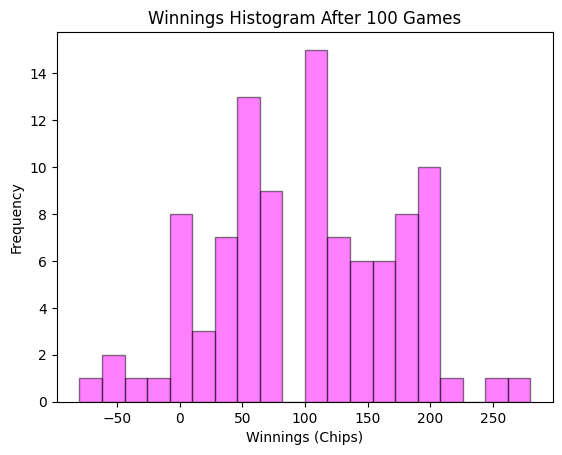

Average Winnings per Game: 99.20 chips
Standard Deviation of Winnings: 72.75 chips
Probability of Net Win: 0.40
Probability of Net Loss: 0.45


In [23]:
import statistics
def simulate_round(player_chips):
    # Simulate win/loss: For simplicity, assume 50% win, 50% loss (can be customized)
    outcome = random.choice(['win', 'loss'])
    bet = 10  # Each round, players bet 10 chips (can be adjusted)
    
    if outcome == 'win':
        player_chips += bet
    else:
        player_chips -= bet
    
    return player_chips

# Parameters for the game
num_games = 100  # Number of games
num_rounds = 50  # Number of rounds per game
initial_chips = 100  # Initial chips for each player

# Store the final winnings for each game
winnings_list = []

# Simulate 100 games
for _ in range(num_games):
    player_chips = initial_chips  # Reset chips at the start of each game
    
    # Simulate 50 rounds for each game
    for _ in range(num_rounds):
        player_chips = simulate_round(player_chips)
    
    # Store the final chips after 50 rounds for this game
    winnings_list.append(player_chips)

# Plotting the histogram of winnings
plt.hist(winnings_list, bins=20, alpha=0.5, color='fuchsia', edgecolor='black')
plt.title('Winnings Histogram After 100 Games')
plt.xlabel('Winnings (Chips)')
plt.ylabel('Frequency')
plt.show()

# Calculate the average winnings per round
average_winnings = sum(winnings_list) / len(winnings_list)

# Calculate the standard deviation of the winnings
std_dev_winnings = statistics.stdev(winnings_list)

# Calculate the probability of a net win or loss after 50 rounds
net_wins = sum(1 for winnings in winnings_list if winnings > initial_chips)
net_losses = sum(1 for winnings in winnings_list if winnings < initial_chips)

prob_win = net_wins / num_games
prob_loss = net_losses / num_games

# Print results
print(f"Average Winnings per Game: {average_winnings:.2f} chips")
print(f"Standard Deviation of Winnings: {std_dev_winnings:.2f} chips")
print(f"Probability of Net Win: {prob_win:.2f}")
print(f"Probability of Net Loss: {prob_loss:.2f}")


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

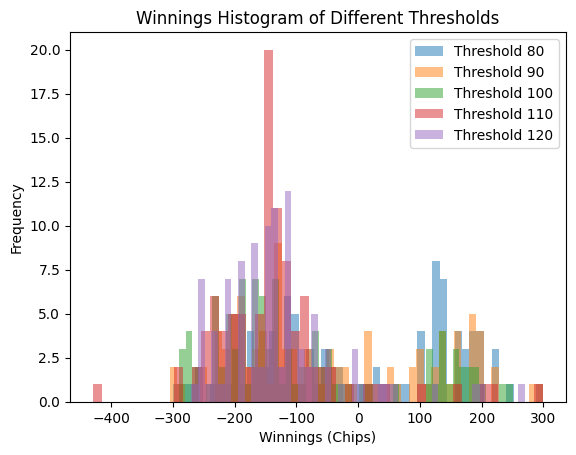

Threshold 80:
  Average Winnings: -6.45 chips
  Standard Deviation of Winnings: 154.41 chips
  Probability of Net Win: 0.36
  Probability of Net Loss: 0.60

Threshold 90:
  Average Winnings: -41.30 chips
  Standard Deviation of Winnings: 155.32 chips
  Probability of Net Win: 0.25
  Probability of Net Loss: 0.72

Threshold 100:
  Average Winnings: -89.85 chips
  Standard Deviation of Winnings: 148.86 chips
  Probability of Net Win: 0.21
  Probability of Net Loss: 0.79

Threshold 110:
  Average Winnings: -134.60 chips
  Standard Deviation of Winnings: 104.50 chips
  Probability of Net Win: 0.05
  Probability of Net Loss: 0.95

Threshold 120:
  Average Winnings: -128.10 chips
  Standard Deviation of Winnings: 97.02 chips
  Probability of Net Win: 0.04
  Probability of Net Loss: 0.96



In [24]:
def simulate_round(player_chips, threshold):
    outcome = random.choice(['win', 'loss'])
    bet = 10  
    if outcome == 'win':
        player_chips += bet
    else:
        player_chips -= bet
    if player_chips < threshold:
        player_chips -= 5 
    return player_chips
num_games = 100  # Number of games
num_rounds = 50  # Number of rounds per game
initial_chips = 100  # Initial chips for each player

# Threshold values to experiment with
threshold_values = [80, 90, 100, 110, 120]  # Different thresholds to test

# Store the results for each threshold
results = {}

# Simulate games for each threshold
for threshold in threshold_values:
    winnings_list = []
    
    for _ in range(num_games):
        player_chips = initial_chips  # Reset chips at the start of each game
        
        # Simulate 50 rounds for each game
        for _ in range(num_rounds):
            player_chips = simulate_round(player_chips, threshold)
        
        # Store the final chips after 50 rounds for this game
        winnings_list.append(player_chips)
    
    # Calculate the average winnings per game
    average_winnings = sum(winnings_list) / len(winnings_list)
    
    # Calculate the standard deviation of the winnings
    std_dev_winnings = statistics.stdev(winnings_list)
    
    # Calculate the probability of a net win or loss after 50 rounds
    net_wins = sum(1 for winnings in winnings_list if winnings > initial_chips)
    net_losses = sum(1 for winnings in winnings_list if winnings < initial_chips)
    
    prob_win = net_wins / num_games
    prob_loss = net_losses / num_games
    
    # Store the results for this threshold
    results[threshold] = {
        'average_winnings': average_winnings,
        'std_dev_winnings': std_dev_winnings,
        'prob_win': prob_win,
        'prob_loss': prob_loss,
        'winnings_list': winnings_list
    }
    
    # Plotting the histogram for this threshold value
    plt.hist(winnings_list, bins=50, alpha=0.5, label=f'Threshold {threshold}')
    
# Customize the histogram plot
plt.title('Winnings Histogram of Different Thresholds')
plt.xlabel('Winnings (Chips)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results for each threshold
for threshold, result in results.items():
    print(f"Threshold {threshold}:")
    print(f"  Average Winnings: {result['average_winnings']:.2f} chips")
    print(f"  Standard Deviation of Winnings: {result['std_dev_winnings']:.2f} chips")
    print(f"  Probability of Net Win: {result['prob_win']:.2f}")
    print(f"  Probability of Net Loss: {result['prob_loss']:.2f}")
    print()


In [25]:
###
# The best threshold is 80. It has the highest probability of net win and 63% of the time, the player ends
# with fewer chips than they started, but this rate worsens as the threshold increases. 
###

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

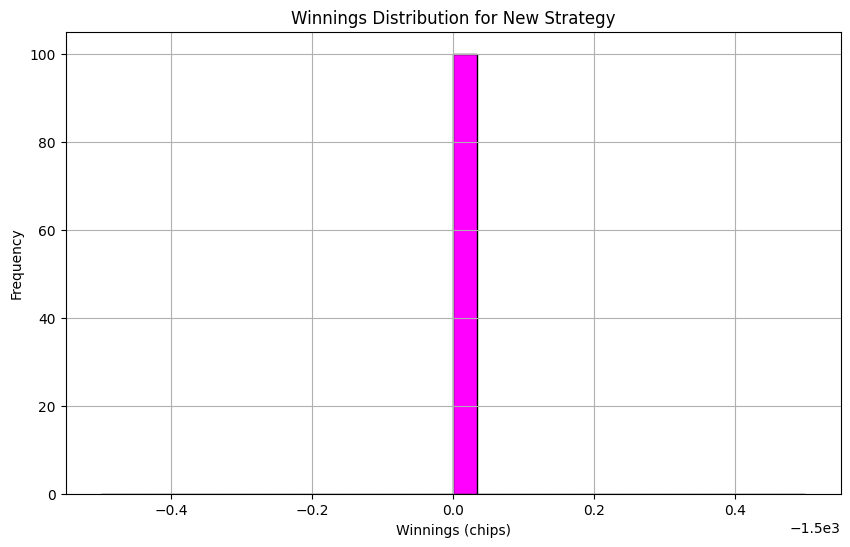

Average Winnings: -1500.00 chips
Standard Deviation: 0.00 chips
Minimum winnings: -1500
Maximum winnings: -1500


In [49]:
class Card:
    def __init__(self, suit, rank, value):
        self.suit = suit
        self.rank = rank
        self.value = value

# Player class to represent a player in the game
class Player:
    def __init__(self, name="Player", chips=1000):
        self.name = name
        self.chips = chips  # Initialize chips as part of the player object
        self.hand = []  # Initialize an empty hand for the player

    # Method to receive a card
    def receive_card(self, card):
        self.hand.append(card)

    # Method to calculate hand value (placeholder, needs to be customized)
    def hand_value(self):
        return sum(card.value for card in self.hand)  # This is a placeholder

# Dealer class to represent the dealer
class Dealer:
    def __init__(self):
        self.hand = []

    # Method to receive a card
    def receive_card(self, card):
        self.hand.append(card)

    # Method to calculate dealer's hand value (similar to Player's hand_value)
    def hand_value(self):
        return sum(card.value for card in self.hand)  # This is a placeholder

# Create a deck of cards (simplified for this example)
def create_deck():
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}

    deck = [Card(suit, rank, values[rank]) for suit in suits for rank in ranks]
    random.shuffle(deck)
    return deck

# Player strategy implementation
def new_strategy(player, dealer, threshold=100):
    deck = create_deck()  # Shuffle the deck at the start of each new game
    player.hand = []  # Reset player's hand at the start of the strategy
    dealer.hand = []  # Reset dealer's hand
    
    # Deal initial cards to player and dealer
    for _ in range(2):
        player.receive_card(deck.pop())
        dealer.receive_card(deck.pop())

    # Run 50 rounds per game
    for round_num in range(50):
        player_hand_value = player.hand_value()  # Calculate player hand value
        dealer_hand_value = dealer.hand_value()  # Calculate dealer hand value
        
        # Player strategy: Hit or stand based on hand value
        while player_hand_value < threshold and player_hand_value <= 21:
            player.receive_card(deck.pop())  # Player hits
            player_hand_value = player.hand_value()  # Recalculate hand value

        # Dealer strategy: Dealer hits until their hand is 17 or higher
        while dealer_hand_value < 17 and dealer_hand_value <= 21:
            dealer.receive_card(deck.pop())  # Dealer hits
            dealer_hand_value = dealer.hand_value()  # Recalculate hand value

        # Check for busts and adjust chips
        if player_hand_value > 21:  # Player busts
            player.chips -= 50
        elif dealer_hand_value > 21 or player_hand_value > dealer_hand_value:  # Player wins
            player.chips += 100
        elif player_hand_value < dealer_hand_value:  # Player loses
            player.chips -= 100

    return player

# Simulate and check winnings distribution
def sim_strategy(num_games=100):
    winnings = []
    
    for _ in range(num_games):
        # Create a new player and dealer
        player = Player(name="Player1")  # Default starting chips (e.g., 1000)
        dealer = Dealer()
        
        # Apply the strategy
        player = new_strategy(player, dealer)
        
        # Store player's final chip count
        winnings.append(player.chips)
    
    return winnings

# Function to plot the histogram
def plot_histogram(winnings):
    plt.figure(figsize=(10, 6))
    plt.hist(winnings, bins=30, color='fuchsia', edgecolor='black')
    plt.title('Winnings Distribution for New Strategy')
    plt.xlabel('Winnings (chips)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Run simulation and plot
winnings = sim_strategy()  # Simulate the strategy
plot_histogram(winnings)   # Plot the histogram

# Calculate the average winnings and standard deviation
average_winnings = sum(winnings) / len(winnings)
standard_deviation = (sum([(x - average_winnings) ** 2 for x in winnings]) / len(winnings)) ** 0.5

print(f"Average Winnings: {average_winnings:.2f} chips")
print(f"Standard Deviation: {standard_deviation:.2f} chips")

print(f"Minimum winnings: {min(winnings)}")
print(f"Maximum winnings: {max(winnings)}")
